# Implemetation of Backpropagation 

In [4]:
class DNN_classifier():
    
    def __init__(self,num_hidden_layers=2,layer_sizes=[12,10,10],num_classes=2,momentum=0.9): ## layer sizes includes dimensions 
        
        layer_sizes.append(num_classes);
        
#         num_hidden_units=
        self.weights={};
        self.bias={};
        self.layer_sizes=layer_sizes;
        self.num_classes=num_classes;
        self.momentum=momentum;
        self.z={};
        self.a={};
        self.grads={};
        self.epsilon=0.000000001;
        
        for i in range(1,len(layer_sizes)):
#             np.random.seed(i);

#             n = np.sqrt((layer_sizes[i]+layer_sizes[i-1])/2); ## xavier initialisation 
#             w = np.random.normal(loc=0,scale=(2/n),size=(layer_sizes[i],layer_sizes[i-1]))
#             b= np.random.normal(size=(layer_sizes[i],1));

            np.random.seed(123)
        
            
            
            w= 0.05 * np.random.randn(layer_sizes[i],layer_sizes[i-1]);
            b=np.zeros((layer_sizes[i],1));

#             print(i,w.shape,b.shape);
            name='w'+str(i);
            self.weights[name]=np.copy(w);
            name='b'+str(i);
            self.bias[name]=np.copy(b);
            
            name='a'+str(i);
            a=np.random.random((layer_sizes[i],1));
            
            self.a[name]=np.copy(a);
            name='z'+str(i);
            d=np.random.random((layer_sizes[i],1));
            
            self.z[name]=np.copy(d);
            
#         print(self.,self.z)
        
    
    
    def softmax(self,x):
        temp=np.copy(x);
        
        temp=np.exp(temp);
        return temp/np.sum(temp);
    
            
    
    def relu(self,x):
        temp=np.copy(x);
        for c in range(len(x)):
            if temp[c,0]<0:
                temp[c,0]=0;
        return temp;
        
    
    
    
    def forward_pass(self,data): ### number of examples X num of features 
        
        self.a['a1']= np.copy( (self.weights['w1']@data)+self.bias['b1']);
        
        self.z['z1']=np.copy(self.relu(self.a['a1']));
        
        self.a['a2']= np.copy((self.weights['w2']@self.z['z1'])+self.bias['b2']);
        
        self.z['z2']= np.copy(self.relu(self.a['a2']));
        
        self.a['a3']= np.copy((self.weights['w3']@self.z['z2'])+self.bias['b3']);
        
        self.z['z3']= np.copy(self.softmax(self.a['a3']));
        
#         print(self.z['z3'])

#         print(self.a);
    
    def backward_pass(self,data,y):
        
       
        self.grads['dL_da3'] = np.copy(self.z['z3']-y);
        
        self.grads['dL_dw3'] = np.copy(self.grads['dL_da3'] @ self.z['z2'].T);
        
        self.grads['dL_db3'] = np.copy(self.grads['dL_da3']) ;
        
        ## for dL_da2 
        
        temp=np.copy(self.z['z2']);
        temp[temp>0]=1; ## applying relu gradient ;
        dz_da = np.diag(temp.reshape(-1,));
        
        self.grads['dL_da2']= np.copy( dz_da @ (self.weights['w3'].T) @ self.grads['dL_da3'] );
        
        self.grads['dL_db2']= np.copy(self.grads['dL_da2']);
        
        self.grads['dL_dw2']= np.copy(self.grads['dL_da2'] @ self.z['z1'].T);
        
        
        temp=np.copy(self.z['z1']);
        temp[temp>0]=1; ## applying relu gradient ;
        dz_da=np.diag(temp.reshape(-1,));
        
        
        self.grads['dL_da1']= np.copy(dz_da @(self.weights['w2'].T) @ self.grads['dL_da2']);
        
        self.grads['dL_db1']= np.copy(self.grads['dL_da1']);
        
        self.grads['dL_dw1']=np.copy(self.grads['dL_da1'] @ data.T);
        
        
        
        
        
    def train(self,data,y,num_epochs=20,is_moment=False,learning_rate=0.01):
        
        
        loss_list=[];
        
        
        ## For momentum 
        
        acc_grad_w1,acc_grad_w2,acc_grad_w3 = np.zeros((self.weights['w1'].shape[0],self.weights['w1'].shape[1])),\
                                      np.zeros((self.weights['w2'].shape[0],self.weights['w2'].shape[1])),\
                                      np.zeros((self.weights['w3'].shape[0],self.weights['w3'].shape[1]));
            
        acc_grad_b1,acc_grad_b2,acc_grad_b3 = np.zeros((self.bias['b1'].shape[0],self.bias['b1'].shape[1])),\
                                  np.zeros((self.bias['b2'].shape[0],self.bias['b2'].shape[1])),\
                                  np.zeros((self.bias['b3'].shape[0],self.bias['b3'].shape[1]));

        
        
        
        for i in range(num_epochs):
            
            loss=0;
            
            grad_w1,grad_w2,grad_w3 = np.zeros((self.weights['w1'].shape[0],self.weights['w1'].shape[1])),\
                                      np.zeros((self.weights['w2'].shape[0],self.weights['w2'].shape[1])),\
                                      np.zeros((self.weights['w3'].shape[0],self.weights['w3'].shape[1]));
            
            grad_b1,grad_b2,grad_b3 = np.zeros((self.bias['b1'].shape[0],self.bias['b1'].shape[1])),\
                                      np.zeros((self.bias['b2'].shape[0],self.bias['b2'].shape[1])),\
                                      np.zeros((self.bias['b3'].shape[0],self.bias['b3'].shape[1]));
            
            
            
            for j in range(len(data)):
            
                self.forward_pass(data[j].reshape(-1,1));
                self.backward_pass(data[j].reshape(-1,1),y[j].reshape(-1,1));
                
                
                
            
                ## aggregating gradients over data samples 
                grad_w1+= self.grads['dL_dw1'];
                grad_w2+= self.grads['dL_dw2'];
                grad_w3+= self.grads['dL_dw3'];
                
                grad_b1+= self.grads['dL_db1'];
                grad_b2+= self.grads['dL_db2'];
                grad_b3+= self.grads['dL_db3'];
                
                loss += -1*( y[j,0]*np.log(self.z['z3'][0,0]) + y[j,1]*np.log(self.z['z3'][1,0]) );
            
            loss=loss/len(data);
            
            loss_list.append(loss);
            
            print(' loss for epoch {} is {}'.format(i+1,loss));
            
            ### updates 
            if(is_moment==False):
                self.weights['w1'] = self.weights['w1'] - learning_rate*grad_w1;
                self.weights['w2'] = self.weights['w2'] - learning_rate*grad_w2;
                self.weights['w3'] = self.weights['w3'] - learning_rate*grad_w3;
                
                self.bias['b1'] = self.bias['b1'] - learning_rate*grad_b1;
                self.bias['b2'] = self.bias['b2'] - learning_rate*grad_b2;
                self.bias['b3'] = self.bias['b3'] - learning_rate*grad_b3;
        
            else: ## momentum 
#                 print('moment')
                if i==0:
                    m=0;
                else:
                    m= self.momentum;
                acc_grad_w1 = m*acc_grad_w1 + grad_w1;
                acc_grad_w2 = m*acc_grad_w2 + grad_w2;
                acc_grad_w3 = m*acc_grad_w3 + grad_w3;
                
                self.weights['w1'] = self.weights['w1'] - learning_rate*acc_grad_w1;
                self.weights['w2'] = self.weights['w2'] - learning_rate*acc_grad_w2;
                self.weights['w3'] = self.weights['w3'] - learning_rate*acc_grad_w3;
                
                
                acc_grad_b1 = m*acc_grad_b1 + grad_b1;
                acc_grad_b2 = m*acc_grad_b2 + grad_b2;
                acc_grad_b3 = m*acc_grad_b3 + grad_b3;
                
                self.bias['b1'] = self.bias['b1'] - learning_rate*acc_grad_b1;
                self.bias['b2'] = self.bias['b2'] - learning_rate*acc_grad_b2;
                self.bias['b3'] = self.bias['b3'] - learning_rate*acc_grad_b3;
                
                
                
                
#         print(self.z['z2']);    
        return loss_list;    
            

    def accuracy(self,data,y):

        sum_=0;
        
#         print(self.z['z3']);
        
        y_pred=np.zeros((y.shape[0],y.shape[1]));

        for i in range(len(y)):
            self.forward_pass(data[i].reshape(-1,1));
#             print(self.z['z3'].reshape(1,-1));
            y_pred[i,:]=self.z['z3'].reshape(1,-1);
#             print(y_pred[i])
#             print(y[i]);
            if(np.argmax(y_pred[i])==np.argmax(y[i])):
                sum_=sum_+1;
#         print(self.z['z3']);
        
        return sum_/len(data);

    def ce_loss(self,data,y):
        l=0;
        for i in range(len(data)):
            self.forward_pass(data[i].reshape(-1,1));
#             print('details');
#             print(y[i]);
#             print(self.z['z3']);
            l += -1*( y[i,0]*np.log(self.z['z3'][0,0]) + y[i,1]*np.log(self.z['z3'][1,0]) );
        return l/len(data);


# One Hot Encoding for targets 

In [159]:
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder(sparse=False);
y_train[y_train==-1]=0;
y_test[y_test==-1]=0;

y_train_enc=enc.fit_transform(y_train.reshape(-1,1));
y_train_enc
y_test_enc=enc.transform(y_test.reshape(-1,1))




 loss for epoch 1 is 0.6931468771238335
 loss for epoch 2 is 0.6931100339866287
 loss for epoch 3 is 0.6930709022821562
 loss for epoch 4 is 0.6930584263504989
 loss for epoch 5 is 0.6930523461514223
 loss for epoch 6 is 0.6930442739821888
 loss for epoch 7 is 0.6930366498149183
 loss for epoch 8 is 0.6930287156215014
 loss for epoch 9 is 0.6930195109970114
 loss for epoch 10 is 0.6930098995512097
 loss for epoch 11 is 0.692999850296806
 loss for epoch 12 is 0.6929893299415528
 loss for epoch 13 is 0.6929783026551944
 loss for epoch 14 is 0.6929682282352561
 loss for epoch 15 is 0.6929558612865657
 loss for epoch 16 is 0.6929431630362655
 loss for epoch 17 is 0.6929297902454805
 loss for epoch 18 is 0.6929156904463811
 loss for epoch 19 is 0.6929008066677589
 loss for epoch 20 is 0.6928850769440109
 loss for epoch 21 is 0.692868433767802
 loss for epoch 22 is 0.6928526931409076
 loss for epoch 23 is 0.6928336352058385
 loss for epoch 24 is 0.6928139413846357
 loss for epoch 25 is 0.692

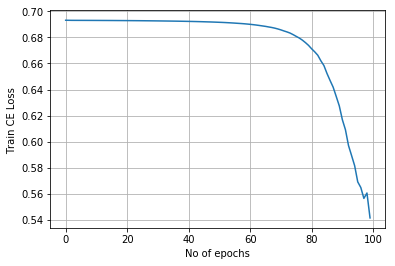

In [13]:
x_train=np.asarray([[1,0],[1,1],[0,1],[0,0]])
y_train = np.asarray([[0,1],[0,0],[1,0],[1,1]])

clf=DNN_classifier(layer_sizes=[2,4,4],num_classes=2,);

loss_list1 = clf.train(x_train,y_train,learning_rate=0.1,num_epochs=100,is_moment=False);
train_acc=clf.accuracy(x_train,y_train)
# test_acc=clf.accuracy(x_test,y_test)


    
# print('Train Accuracy is {} and Test Accuracy is {}'.format(train_acc,test_acc));

plt.grid(True);
plt.plot(loss_list1[0:]);
plt.xlabel('No of epochs');
plt.ylabel('Train CE Loss ')
plt.show();


# Without momentum and 10 hidden Nodes 

 loss for epoch 1 is 6.282666970224327
 loss for epoch 2 is 2.022831374749467
 loss for epoch 3 is 3.394918119369057
 loss for epoch 4 is 1.4073530095994344
 loss for epoch 5 is 2.2026753810543527
 loss for epoch 6 is 0.8430710413723033
 loss for epoch 7 is 1.0641084059674553
 loss for epoch 8 is 0.6908649941868016
 loss for epoch 9 is 0.6014714198543707
 loss for epoch 10 is 0.4189386979483321
 loss for epoch 11 is 0.2770117561795644
 loss for epoch 12 is 0.2332393695042966
 loss for epoch 13 is 0.21398404231451473
 loss for epoch 14 is 0.20476248199813898
 loss for epoch 15 is 0.19802508979149772
 loss for epoch 16 is 0.19194081472264443
 loss for epoch 17 is 0.186292956454396
 loss for epoch 18 is 0.1810209045182753
 loss for epoch 19 is 0.1760150840698405
 loss for epoch 20 is 0.17123914043823277
Train Accuracy is 0.95 and Test Accuracy is 0.9


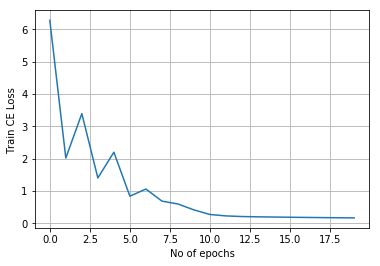

In [297]:
from operator import add

num_epochs=20;




clf=DNN_classifier(layer_sizes=[12,10,10]); ## input layer, hidden 1, hidden 2

loss_list1 = clf.train(x_train_pca,y_train_enc,learning_rate=0.006,num_epochs=num_epochs,is_moment=False);
train_acc=clf.accuracy(x_train_pca,y_train_enc)
test_acc=clf.accuracy(x_test_pca,y_test_enc)


    
print('Train Accuracy is {} and Test Accuracy is {}'.format(train_acc,test_acc));

plt.grid(True);
plt.plot(loss_list1[0:]);
plt.xlabel('No of epochs');
plt.ylabel('Train CE Loss ')
plt.show();

### Train Accuracy is 95% and Test Accuracy is 90%

# Without momentum and 15 hidden Nodes

 loss for epoch 1 is 3.97916131043698
 loss for epoch 2 is 1.5507462820874724
 loss for epoch 3 is 0.8702862046366576
 loss for epoch 4 is 0.5465379811440569
 loss for epoch 5 is 0.39535256933996343
 loss for epoch 6 is 0.3418513915824196
 loss for epoch 7 is 0.30185034439296893
 loss for epoch 8 is 0.27017886968320526
 loss for epoch 9 is 0.24403779208977502
 loss for epoch 10 is 0.2218760513802386
 loss for epoch 11 is 0.2029111239454843
 loss for epoch 12 is 0.18656215509694613
 loss for epoch 13 is 0.1724839532601968
 loss for epoch 14 is 0.16040949985191486
 loss for epoch 15 is 0.14937068026851968
 loss for epoch 16 is 0.1398915040240366
 loss for epoch 17 is 0.1310661944639191
 loss for epoch 18 is 0.1234446682078338
 loss for epoch 19 is 0.1161556757334656
 loss for epoch 20 is 0.10965474856204585
Train Accuracy is 1.0 and Test Accuracy is 0.8


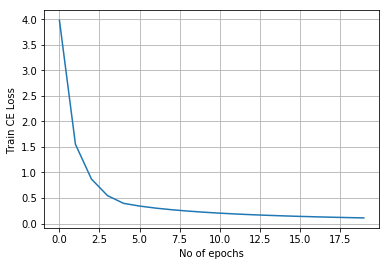

In [301]:

num_epochs=20;






clf=DNN_classifier(layer_sizes=[12,15,15]); ## input layer, hidden 1, hidden 2

loss_list2 = clf.train(x_train_pca,y_train_enc,learning_rate=0.005,num_epochs=num_epochs,is_moment=False);
train_acc=clf.accuracy(x_train_pca,y_train_enc)
test_acc=clf.accuracy(x_test_pca,y_test_enc)


    
print('Train Accuracy is {} and Test Accuracy is {}'.format(train_acc,test_acc));

plt.grid(True);
plt.plot(loss_list2[0:]);
plt.xlabel('No of epochs');
plt.ylabel('Train CE Loss ')
plt.show();
del clf 

### Train Accuracy is 100% and Test Accuracy is 80%

### This indicates that the increasing hidden units from 10 to 15 increases the rate of convergence of training loss as for 20 iterations training loss is less in case of 15 units .

### This indicates bias is reduced as model complexity increses but as the number of training examples are very less increasing complexity causes overfitting.

# With momentum and 10 hidden Nodes¶

 loss for epoch 1 is 4.666716255051513
 loss for epoch 2 is 2.792772667508006
 loss for epoch 3 is 1.2764910563694092
 loss for epoch 4 is 0.8116713458471665
 loss for epoch 5 is 0.4766991002787216
 loss for epoch 6 is 0.3431801406182553
 loss for epoch 7 is 0.27956130639447274
 loss for epoch 8 is 0.22514921694631468
 loss for epoch 9 is 0.19447361635062513
 loss for epoch 10 is 0.19448402048455368
 loss for epoch 11 is 0.16383788273843763
 loss for epoch 12 is 0.13635281013184725
 loss for epoch 13 is 0.11252789534247461
 loss for epoch 14 is 0.09675143349913215
 loss for epoch 15 is 0.08482992094732203
 loss for epoch 16 is 0.07705253092722944
 loss for epoch 17 is 0.07321765175842979
 loss for epoch 18 is 0.06990078135597275
 loss for epoch 19 is 0.06469009270428254
 loss for epoch 20 is 0.056704102127701425
0.047650392363306315
Train Accuracy is 1.0 and Test Accuracy is 1.0


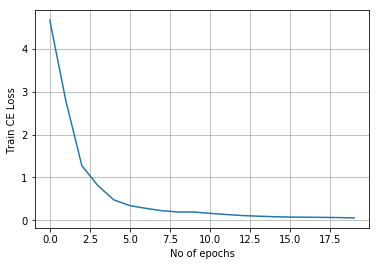

In [312]:
from operator import add

num_epochs=20;




clf=DNN_classifier(layer_sizes=[12,10,10],momentum=0.9); ## input layer, hidden 1, hidden 2

loss_list1m = clf.train(x_train_pca,y_train_enc,learning_rate=0.005,num_epochs=num_epochs,is_moment=True);
train_acc=clf.accuracy(x_train_pca,y_train_enc)
print(clf.ce_loss(x_train_pca,y_train_enc))
# test_acc=clf.accuracy(x_test_pca,y_test_enc)
#

    
    
print('Train Accuracy is {} and Test Accuracy is {}'.format(train_acc,train_acc));

plt.grid(True);
plt.plot(loss_list1m);
plt.xlabel('No of epochs');
plt.ylabel('Train CE Loss ');
plt.show();

del clf; 


### Train Accuracy is 100% and Test Accuracy is 100% .

### Using momentum leads to faster convergence of training loss with a smooth curve.

# With momentum 15 nodes

 loss for epoch 1 is 2.14515621953705
 loss for epoch 2 is 0.9307028860316455
 loss for epoch 3 is 0.6552363082115006
 loss for epoch 4 is 0.6364766530134623
 loss for epoch 5 is 0.31998987623306496
 loss for epoch 6 is 0.11867016977733011
 loss for epoch 7 is 0.10409523295832028
 loss for epoch 8 is 0.16064748242055685
 loss for epoch 9 is 0.1621739872872115
 loss for epoch 10 is 0.11415745009097555
 loss for epoch 11 is 0.0565945478895208
 loss for epoch 12 is 0.025606779554894772
 loss for epoch 13 is 0.016397931100136622
 loss for epoch 14 is 0.01690431414074614
 loss for epoch 15 is 0.0232918474452453
 loss for epoch 16 is 0.030831667802573626
 loss for epoch 17 is 0.03128054875298848
 loss for epoch 18 is 0.024132916904416844
 loss for epoch 19 is 0.016365328131598602
 loss for epoch 20 is 0.011376654917204757
Train Accuracy is 1.0 and Test Accuracy is 0.9


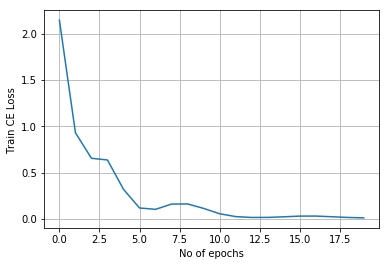

In [330]:
from operator import add

num_epochs=20;




clf=DNN_classifier(layer_sizes=[12,15,15]); ## input layer, hidden 1, hidden 2

loss_list2m = clf.train(x_train_pca,y_train_enc,learning_rate=0.005,num_epochs=num_epochs,is_moment=True);
train_acc=clf.accuracy(x_train_pca,y_train_enc)
test_acc=clf.accuracy(x_test_pca,y_test_enc)


    
print('Train Accuracy is {} and Test Accuracy is {}'.format(train_acc,test_acc));

plt.grid(True);
plt.plot(loss_list2m);
plt.xlabel('No of epochs');
plt.ylabel('Train CE Loss ');
plt.show();

### Train Accuracy is 100% and Test Accuracy is 90%.


### With momentum also the 15 hidden units network was not able to give 100% test accuracy due to overfitting.

# Comparison of all cases 

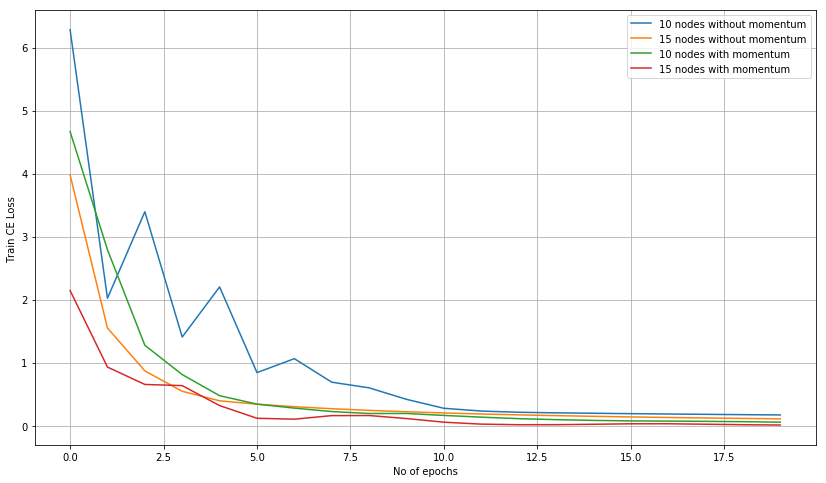

In [331]:

plt.figure(figsize=(14,8))
plt.plot(loss_list1);
plt.plot(loss_list2)
plt.plot(loss_list1m)
plt.plot(loss_list2m)

plt.xlabel('No of epochs');
plt.ylabel('Train CE Loss ');
plt.grid(True);
plt.legend(['10 nodes without momentum','15 nodes without momentum','10 nodes with momentum','15 nodes with momentum'])
plt.show();

# Conclusions 

### 1. The network with 10 hidden units without momentum seems to have some sort of spikes in training loss which indicates gradients obtained without momentum were noisy .

### 2. When Momentum applied to 10 hidden units network the training loss converges faster to its minimum value compared to 10 units without momentum, with a smooth curve indicating momentum reduces the update in noisy gradient directions and boost up update in oscillating gradients directions.

### 3. Same above arguments can be given for 15 hidden nodes.

### 4. It can be also seen that the training loss decreases more fastly with 15 hidden units  than with 10 hidden nodes and it is supported by the fact that model becomes more complex but on the other hand test accuracy decreases as hidden layer size is increased and model starts overfitting the training data which is very limited.